<center>
    <font size=5><b>Programming3 Project</b></font>
    <br><br>
    <b>: 노트북 데이터를 활용하여 사용자가 원하는 조건의 노트북들을 비교 분석하기</b>
</center>    
    <br><br>
    <div style="text-align: right"> 산업데이터사이언스학부 Team05</div>
    <div style="text-align: right"> 201804200 나승채</div>
    <div style="text-align: right"> 201804234 이현도</div>
    <div style="text-align: right"> 201804255 함도윤</div>
    
---
### >프로젝트 주제 선정 이유

: 노트북과 같이 다양한 스펙을 갖는 데이터가 있는 제품을 구매하고자 할때,  
 내가 원하는 스펙의 조건중 가장 합리적인 제품인 무엇인지 결정하는데에는 많은 어려움이 있다.  
 
 현재 네이버나 다나와 쇼핑몰에서는 cpu와 제조사, 화면 크기, 메모리, 저장 용량, 무게까지는 원하는 스펙을 선택하여  
 그에 맞는 제품을 확인할 수 있도록 구성되어 있지만, GPU나 배터리, HDMI 포트 유무, 두께, 웹캠 유무처럼  
 섬세한 스펙은 선택하여 볼 수 없다. 
 
 따라서 이런 부족한 부분을 보완하여 소비자가 자신에게 적합한 노트북을 선택할 수 있도록  
 도와주는 시스템을 구축하는 것이 본 프로젝트 주제 선정의 목표다.
 
 
 
---

### >데이터 소개

- 다나와 쇼핑몰에서 노트북를 검색하여 나오는 페이지와 각 노트북 상세 페이지에서 크롤링 진행


<div>
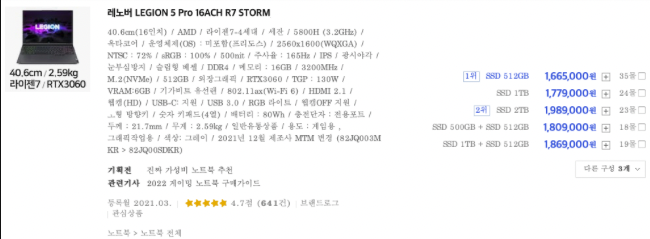 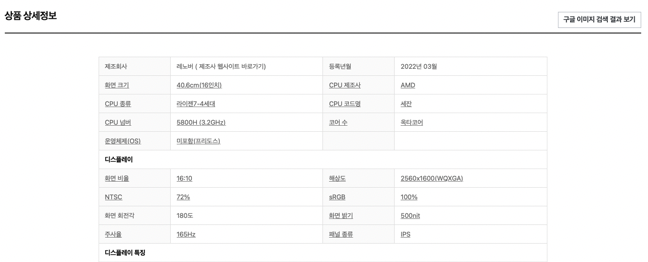
</div>

# Data Crawling  
: 다나와 쇼핑몰에서 '노트북'을 검색하여 인기상품목록을 크롤링하였다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='Malgun Gothic')
import seaborn as sns
import re
import time
plt.rcParams['axes.unicode_minus'] = False
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver import ChromeOptions
from bs4 import BeautifulSoup

options = ChromeOptions()
options.add_argument('headless')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [13]:
import numpy as np

item_list = []
want_title = ["화면 크기","CPU 종류","운영체제(OS)",'화면 비율','광시야각','메모리 타입','메모리','저장 용량','저장장치 종류','GPU 칩셋','HDMI','웹캠(HD)','배터리','어댑터','두께','무게','USB','ㅗ형 방향키','ㅡ형 방향키']

for page in range(1,10): #몇 페이지 까지 할 것인지 range 결정

    print('\n',page)
    url = "http://search.danawa.com/dsearch.php?query=%EB%85%B8%ED%8A%B8%EB%B6%81&originalQuery=%EB%85%B8%ED%8A%B8%EB%B6%81&previousKeyword=%EB%85%B8%ED%8A%B8%EB%B6%81&volumeType=allvs&page="+str(page)+"&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=112758&defaultPhysicsCategoryCode=860%7C869%7C10586%7C0&defaultVmTab=85012&defaultVaTab=7076658&tab=goods"
    driver = Chrome(executable_path='/Users/ihyeondo/Downloads/chromedriver') 
    driver.get(url) #셀레니움의 chrom 웹드라이버로 창 열기
    
    soup = BeautifulSoup(driver.page_source) #셀레니움으로 들어간 웹 창에서 beautifulSoup으로 크롤링 진행
    import numpy as np

item_list = []
want_title = ["화면 크기","CPU 종류","운영체제(OS)",'화면 비율','광시야각','메모리 타입','메모리','저장 용량','저장장치 종류','GPU 칩셋','HDMI','웹캠(HD)','배터리','어댑터','두께','무게','USB','ㅗ형 방향키','ㅡ형 방향키']

for page in range(1,10):

    print('\n',page)
    url = "http://search.danawa.com/dsearch.php?query=%EB%85%B8%ED%8A%B8%EB%B6%81&originalQuery=%EB%85%B8%ED%8A%B8%EB%B6%81&previousKeyword=%EB%85%B8%ED%8A%B8%EB%B6%81&volumeType=allvs&page="+str(page)+"&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=112758&defaultPhysicsCategoryCode=860%7C869%7C10586%7C0&defaultVmTab=85012&defaultVaTab=7076658&tab=goods"
    driver = Chrome(executable_path='/Users/ihyeondo/Downloads/chromedriver')
    driver.get(url)
    
    soup = BeautifulSoup(driver.page_source)
    product_li_tags = soup.select('p.prod_name a.click_log_product_standard_title_')
    num = 0
    for tg in product_li_tags:
        item_one_list = []
        
        name = tg.get_text()
        item_one_list.append(name)
        
        link = tg.attrs['href']
        url_item = link
        driver_item = Chrome(executable_path='/Users/ihyeondo/Downloads/chromedriver')
        driver_item.get(url_item)
        soup_item = BeautifulSoup(driver_item.page_source)

        item_inpo_title = soup_item.select('div.detail_cont div.prod_spec table th.tit')
        item_inpo_value = soup_item.select('div.detail_cont div.prod_spec table td.dsc')

        product_price   = soup_item.select('div.row span.lwst_prc em.prc_c')
        item_one_list.append(product_price[0].get_text())
        
        del item_inpo_title[0]
        del item_inpo_value[0]

        item_inpo_title_list = []
        item_inpo_value_list = []
        for tit,val in zip(item_inpo_title,item_inpo_value):
            title = tit.get_text()
            value = val.get_text()
            item_inpo_title_list.append(title)
            item_inpo_value_list.append(value)
            

        for i in want_title:
            if i in item_inpo_title_list:
                item_one_list.append(item_inpo_value_list[item_inpo_title_list.index(i)])
            else:
                item_one_list.append(np.nan)

        item_list.append(tuple(item_one_list))
        print(num,end=' ')
        num += 1
        

    #각 제품의 이름이 있는 부분들 모두 크롤링
    product_li_tags = soup.select('p.prod_name a.click_log_product_standard_title_')
    
    num = 0
    #for 문으로 하나하나 제품들 정보 크롤
        
    #한 제품의 정보들을 임시로 담아둘 list 생성
    item_one_list = []

    #제품 이름 크롤링
    name = tg.get_text()
    item_one_list.append(name)

    #제품 링크 크롤링 후 그 링크로 다시 창 띄우기 -> 상세 페이지 크롤링 진행
    link = tg.attrs['href']
    url_item = link
    driver_item = Chrome(executable_path='/Users/ihyeondo/Downloads/chromedriver')
    driver_item.get(url_item)
    soup_item = BeautifulSoup(driver_item.page_source)

    #제품 상세정보 제목들 크롤링
    item_inpo_title = soup_item.select('div.detail_cont div.prod_spec table th.tit')

    #제품 상세정보 정보들 크롤링
    item_inpo_value = soup_item.select('div.detail_cont div.prod_spec table td.dsc')

    #제품 최저가 크롤링
    product_price   = soup_item.select('div.row span.lwst_prc em.prc_c')
    item_one_list.append(product_price[0].get_text()) #제품 가격이 사이트 별로 많아서 첫번째 가격(최저가)으로 크롤링

    #상세정보에서 제조사에 두 문자열이 포함되어 있어, 크롤링 하기 힘들어 지워주었다.
    del item_inpo_title[0]
    del item_inpo_value[0]

    #위에서 제품 상세정보 제목들 & 정보들 크롤링한 것을 list에 모두 넣어두고 아래에서 indexing 진행
    item_inpo_title_list = []
    item_inpo_value_list = []
    for tit,val in zip(item_inpo_title,item_inpo_value):
        title = tit.get_text()
        value = val.get_text()
        item_inpo_title_list.append(title)
        item_inpo_value_list.append(value)

    #상세정보에서 원하다고 list 만들어놓은 want_title 요소들을 추출
    for i in want_title:
        if i in item_inpo_title_list:
            item_one_list.append(item_inpo_value_list[item_inpo_title_list.index(i)])
        else:
            item_one_list.append(np.nan)

    #한개의 제품에서 필요한 정보들을 넣어둔 item_onelist를 tuple형태로 item_list에 넣기
    item_list.append(tuple(item_one_list))
    print(num,end=' ')
    num += 1 #어디까지 크롤링 진행됐는지 확인


 1


WebDriverException: Message: unknown error: cannot determine loading status
from unknown error: cannot determine loading status
from disconnected: received Inspector.detached event
  (Session info: chrome=105.0.5195.125)


In [ ]:
#모두 담겨진 item_list를 해당 columns을 setting하여 dataframe으로 변환.
df_item = pd.DataFrame(item_list, columns = ['제품명','가격',"화면 크기","CPU 종류","운영체제(OS)",'화면 비율','광시야각','메모리 타입','메모리','저장 용량','저장장치 종류','GPU 칩셋','HDMI','웹캠(HD)','배터리','어댑터','두께','무게','USB','ㅗ형 방향키','ㅡ형 방향키'])

df_item

In [1158]:
#notebooks_final로 저장.
df_item.to_csv("data_story/Programming3/notebooks_final.csv", mode='w')

In [1159]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제품명       360 non-null    object
 1   가격        360 non-null    object
 2   화면 크기     360 non-null    object
 3   CPU 종류    360 non-null    object
 4   운영체제(OS)  360 non-null    object
 5   화면 비율     354 non-null    object
 6   광시야각      281 non-null    object
 7   메모리 타입    350 non-null    object
 8   메모리       360 non-null    object
 9   저장 용량     360 non-null    object
 10  저장장치 종류   360 non-null    object
 11  GPU 칩셋    353 non-null    object
 12  HDMI      225 non-null    object
 13  웹캠(HD)    266 non-null    object
 14  배터리       351 non-null    object
 15  어댑터       306 non-null    object
 16  두께        360 non-null    object
 17  무게        360 non-null    object
 18  USB       358 non-null    object
 19  ㅗ형 방향키    304 non-null    object
 20  ㅡ형 방향키    56 non-null     object
dtypes: object(21)
me

# 2. Data Preprocessing

## 데이터 값 수정  & 형 변환
  
  
  
***크롤링한 데이터를 보기 좋게 변환하기***

In [1160]:
notebooks = pd.read_csv("data_story/Programming3/notebooks_final.csv",index_col = '제품명')
notebooks = notebooks.drop(columns=['Unnamed: 0'])

In [1163]:
notebooks.head()

,가격,화면 크기,CPU 종류,운영체제(OS),화면 비율,광시야각,메모리 타입,메모리,저장 용량,저장장치 종류,GPU 칩셋,HDMI,웹캠(HD),배터리,어댑터,두께,무게,USB,ㅗ형 방향키,ㅡ형 방향키
제품명,,,,,,,,,,,,,,,,,,,,
레노버 아이디어패드 Slim3-15ITL 5D WIN10 16GB램,"637,190",39.62cm(15.6인치),코어i5-11세대,윈도우10,16:9,○,DDR4,16GB,256GB,M.2(NVMe),Iris Xe,○,○,NaN,NaN,19.9mm,1.65kg,총3개,NaN,○
삼성전자 갤럭시북 NT750XDZ-AM58S,"711,000",39.6cm(15.6인치),코어i5-11세대,미포함(프리도스),16:9,○,LPDDR4x(온보드),8GB,256GB,M.2(NVMe),Iris Xe,○,○,54Wh,65W,15.4mm,1.55kg,총4개,○,NaN
LG전자 2022 그램16(12세대) 16ZD90Q-EX76K,"2,249,000",40.6cm(16인치),코어i7-12세대,미포함(프리도스),16:10,○,LPDDR5(온보드),16GB,256GB,M.2(NVMe),RTX2050,○,NaN,90Wh,65W,16.8mm,1.285kg,총4개,○,NaN
레노버 요가 Slim7 Carbon 14ACN6 82L0004YKR,"1,568,000",35.56cm(14인치),라이젠7-4세대,미포함(프리도스),16:10,NaN,LPDDR4x(온보드),16GB,1TB,M.2(NVMe),MX450,NaN,○,61Wh,NaN,14.9mm,1.09kg,총3개,NaN,○
레노버 V15 G2 82KD000UKR 8GB램,"444,990",39.62cm(15.6인치),라이젠5-4세대,미포함(프리도스),16:9,NaN,DDR4,8GB,256GB,M.2(NVMe),Radeon Graphics,○,NaN,38Wh,NaN,19.9mm,1.7kg,총3개,NaN,○


In [1164]:
#데이터를 분석하기 좋게 값들과 형을 변환해주었다.
def preprocessing_data(df):
    
    # ㅗ형 방향키 & ㅡ형 방향키 수정
    # na가 아닌 값이 있는 ㅗ형 방향키와 ㅡ형 방향키 값을 더하면 360개라서(즉, 두 열에 존재하는 값을 더하면 결측치가 없는 열을 만들 수 있다.)
    # ㅗ형 방향키는 값이 있고 ㅡ형 방향키에는 값이 없으면, '1',
    # ㅡ형 방향키는 값이 없고 ㅡ형 방향키에는 값이 있으면, '0'으로 되어있는 열을 생성
    make_wk_list = []
    for wk1,wk2 in zip(df['ㅗ형 방향키'].fillna('0'),df['ㅡ형 방향키'].fillna('0')):
        if (wk1 == '0') & (wk2 != '0'):
            make_wk_list.append('0')
        elif (wk1 != '0') & (wk2 == '0'):
            make_wk_list.append('1')
        else:
            make_wk_list.append(np.nan)
    make_wk = pd.DataFrame(make_wk_list,columns = ['방향키(ㅡ형/ㅗ형)'],dtype = 'category')
    
    #USB 열 수정
    #'n개'형태로 되어있는 값에서 n만 추출하여 값으로 지정함. dtype은 int8로 변환
    def pre_usb(val):
        if val == '0':
            return val
        else:
            return val[1:-1]
    make_usb = df['USB'].fillna('0').apply(pre_usb).rename('USB(개)').astype(np.int8)
    
    #무게 열 수정
    #'nkg'형태로 되어있는 값에서 n만 추출하여 값으로 지정함. dtype은 float64로 변환하고 소숫점 2째자리까지만
    def pre_kg(mm):
        if mm[-2:] == 'kg':
            return mm[:-2]
        else:
            return str(float(mm[:-1])*0.001)
    make_kg = df['무게'].fillna('0').apply(pre_kg).rename('무게(kg)').astype(np.float64).round(2)
    
    #어댑터 열 수정
    #'nW'형태로 되어있는 값에서 n만 추출하여 값으로 지정함. dtype은 float64로 변환하고 소숫점 2째자리까지만
    def pre_ad(ad):
        if ad =='0':
            return np.nan
        else:
            return ad[:-1]
    make_ad = df['어댑터'].fillna('0').apply(pre_ad).rename('어댑터(W)').astype(np.float64).round(2)
    
    #HDMI 열 수정
    #'○'값은 1로 결측치는 '0'으로 지정.
    make_hdmi = df['HDMI'].fillna('0').replace('○','1').astype('category')
    
    #저장 용량 열 수정
    #저장 용량에는 1tb와 2tb 4tb도 있어서 기본 단위는 GB로 하고 TB는 1tb = 1024 ,2tb = 2048로 변환해주었다.
    def pre_sm(sm):
        msm = sm[:-2]
        if msm == '1':
            return msm+'024'
        elif msm == '2':
            return msm+'048'
        elif msm == '4':
            return msm+'096'
        else:
            return msm
    make_sm = df['저장 용량'].apply(pre_sm).rename('저장 용량(GB)').astype(np.int16)
    
    #메모리 열 수정
    #'nGB'형태로 되어있는 값에서 n만 추출하여 값으로 지정함. dtype은 int16로 변환
    def pre_mem(mem):
        return mem[:-2]
    make_mem = df['메모리'].apply(pre_mem).rename('메모리(GB)').astype(np.int16)
    
    #두께 열 수정
    #'nmm'형태로 되어있는 값에서 n만 추출하여 값으로 지정함. dtype은 float64로 변환하고 소숫점 2째자리까지만
    make_mm = df['두께'].apply(pre_mem).rename('두께(mm)').astype(np.float64).round(2)
    
    #가격 열 수정
    #중간중간에 ,를 지워주고 dtype는 int32로 변환
    def pre_pri(pr):
        return pr.replace(',','')
    make_pr = df['가격'].apply(pre_pri).astype(np.int32)
    
    #화면크기 열 수정
    #인치 숫자만 추출하기 위해 앞에 cm단위 값들고 '('')'값들을 모두 없애주고 dtypesm는 category로 변환
    def pre_ds(ds):
        return float(ds.split('(')[-1][:-3])
    make_ds = df['화면 크기'].apply(pre_ds).astype(np.float64).round(2)
    
    #웹캠 열 수정
    #'○'값은 1로 결측치는 '0'으로 지정.
    make_wc = df['웹캠(HD)'].fillna('0').replace('○','1').astype('category')
    
    #광시야각 수정
    #'○'값은 1로 결측치는 '0'으로 지정.
    make_la = df['광시야각'].fillna('0').replace('○','1').astype('category')
    
    #제조사 열 생성
    #제조사는 제품명 모두 맨 앞 단어가 제조사로 되어있는 것으로 판단하여 제품명에서 split[0]으로 추출
    def pre_md(md):
        return md.split(' ')[0]
    make_md = df['제품명'].apply(pre_md).rename('제조사')
    
    #배터리 수정
    #배터리에 na값이 있어 -1로 변환해주고 'nWh'형태로 되어 있는 값에서 n만 추출하여 값으로 지정함. 
    #dtype은 float64로 변환하고 소숫점 2째자리까지만
    def pre_bt(bt):
        if bt == '0':
            return '-1'
        else:
            return bt[:-2]
    make_bt = df['배터리'].fillna('0').apply(pre_bt).rename('배터리(Wh)').astype(np.float64).round(2)
    
    #마지막에 return 값을 pd.concat으로 변환되어 만들어진 list들을 합해줌.
    return pd.concat(
        [make_md,make_pr,make_usb,make_kg,make_ad,make_hdmi,make_sm,
         make_mem,make_mm,make_ds,make_wc,make_la,make_bt,make_wk,
        df['CPU 종류'],df['운영체제(OS)'],df['화면 비율'],df['메모리 타입'],df['저장장치 종류'],df['GPU 칩셋']],axis=1)

In [ ]:
notebooks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 레노버 아이디어패드 Slim3-15ITL 5D WIN10 16GB램 to 한성컴퓨터 TFX3150U Pro
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CPU 종류      360 non-null    object
 1   화면 비율       354 non-null    object
 2   광시야각        360 non-null    object
 3   메모리 타입      350 non-null    object
 4   저장장치 종류     360 non-null    object
 5   GPU 칩셋      353 non-null    object
 6   HDMI        360 non-null    object
 7   가격(원)       360 non-null    object
 8   화면 크기(인치)   360 non-null    object
 9   운영체제        360 non-null    object
 10  메모리(GB)     360 non-null    object
 11  저장 용량(GB)   360 non-null    object
 12  웹캠          360 non-null    object
 13  배터리(Wh)     351 non-null    object
 14  어댑터(W)      306 non-null    object
 15  두께(mm)      360 non-null    object
 16  무게(kg)      360 non-null    object
 17  USB(개)      360 non-null    object
 18  방향키(ㅗ형/ㅡ형)  360 non-null    object
 19  제조사 

# Data Mining 

## 간단하게 가격 확인

In [23]:
total_notebooks = notebooks.index.size
max_price = notebooks['가격(원)'].values.max()
min_price = notebooks['가격(원)'].values.min()
mean_price = notebooks['가격(원)'].values.mean()

print(f'현재 판매중인 전체 {total_notebooks}개의 노트북 중 \n최대가격은 {max_price}원이고\n최소가격은 {min_price}이며,\n평균 판매 금액은 {mean_price.round(2)}원이다.')

현재 판매중인 전체 360개의 노트북 중 
최대가격은 6990000원이고
최소가격은 278990이며,
평균 판매 금액은 1619070.67원이다.


## 세부적으로 가격 확인

In [24]:
# 그룹화 이후 인덱스조정을 위한 함수 설정

def flat_cols(df):
    df.columns = ['_'.join(x) for x in df.columns.to_flat_index()]
    return df

In [25]:
# 제조사별 가격의 집계함수들을 계산

notebooks_group_1 = (
    notebooks.groupby(['제조사'])[['가격(원)']]
    .agg(['size', 'max', 'min', 'mean', 'std'])
    .pipe(flat_cols)
    .reset_index()
)

notebooks_group_1

,제조사,가격(원)_size,가격(원)_max,가격(원)_min,가격(원)_mean,가격(원)_std
0,APPLE,10,3287290,1088300,2.280912e+06,8.815324e+05
1,ASUS,42,5590000,278990,1.725610e+06,1.052265e+06
2,DELL,7,6039870,1390000,3.385696e+06,1.635333e+06
3,GIGABYTE,8,4579000,1279000,2.656750e+06,1.107711e+06
4,HP,11,2480000,453710,1.272491e+06,7.409525e+05
5,LG전자,52,2349000,544370,1.415076e+06,5.049818e+05
6,MSI,97,6990000,549000,1.699242e+06,1.067877e+06
7,Microsoft,1,3408990,3408990,3.408990e+06,NaN
8,Razer,5,5609000,3090000,3.803398e+06,1.034101e+06
9,디클,1,299000,299000,2.990000e+05,NaN


In [27]:
# 판매수량이 많은순, 최고가격, 최소가격, 가격평균이 큰 순, 가격 표준편차가 높은 순으로 정렬
# 컬럼이름을 변경

sorted_group_1 = notebooks_group_1.sort_values(['가격(원)_size', '가격(원)_max', '가격(원)_min', '가격(원)_mean', '가격(원)_std'],
                              ascending = [False, False, True, False, False])


sorted_group_1 = sorted_group_1.rename(columns = {'가격(원)_size' : '판매 개수',
                                                  '가격(원)_max' : '최고 금액',
                                                  '가격(원)_min' : '최소 금액',
                                                  '가격(원)_mean' : '가격 평균',
                                                  '가격(원)_std' : '가격 표준편차'})
sorted_group_1

,제조사,판매 개수,최고 금액,최소 금액,가격 평균,가격 표준편차
6,MSI,97,6990000,549000,1.699242e+06,1.067877e+06
10,레노버,54,6488990,298990,1.244582e+06,8.919317e+05
5,LG전자,52,2349000,544370,1.415076e+06,5.049818e+05
1,ASUS,42,5590000,278990,1.725610e+06,1.052265e+06
11,삼성전자,39,2584060,568990,1.479044e+06,5.086622e+05
14,한성컴퓨터,19,2879000,498000,1.501684e+06,7.434673e+05
4,HP,11,2480000,453710,1.272491e+06,7.409525e+05
13,주연테크,11,1449000,281180,9.742445e+05,3.510498e+05
0,APPLE,10,3287290,1088300,2.280912e+06,8.815324e+05
3,GIGABYTE,8,4579000,1279000,2.656750e+06,1.107711e+06


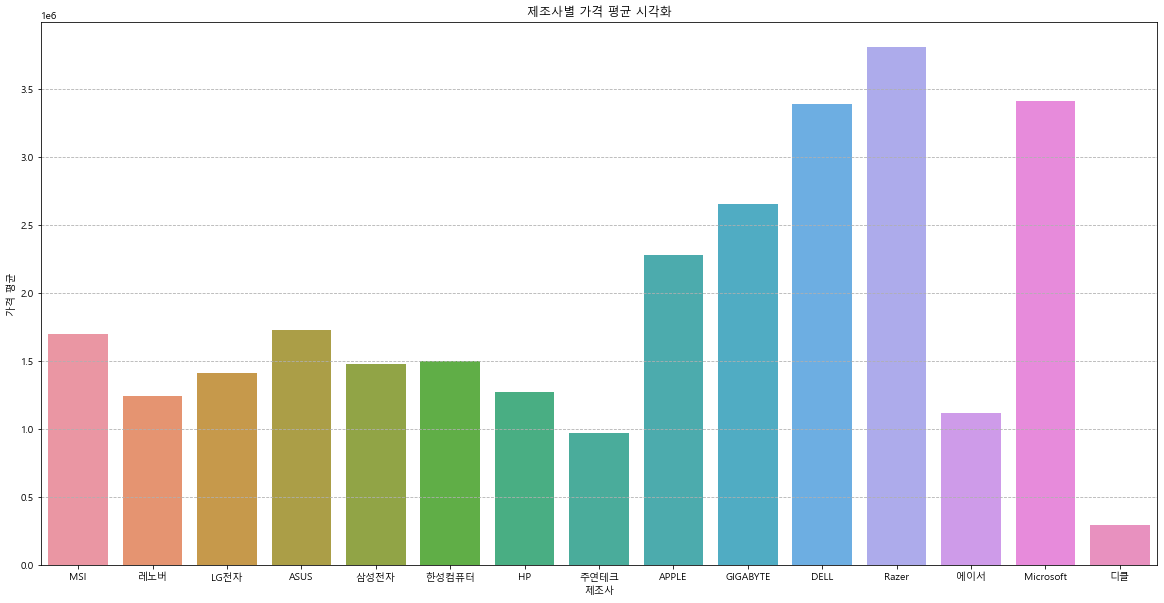

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.grid(linestyle='--')
plt.title('제조사별 가격 평균 시각화')
sns.barplot(x='제조사', y='가격 평균', data=sorted_group_1);

### 우리에게 익숙한 3개 제조사의 시장 점유율

In [32]:
top3 = sorted_group_1.loc[[5, 11, 0]].set_index('제조사')
top3

,판매 개수,최고 금액,최소 금액,가격 평균,가격 표준편차
제조사,,,,,
LG전자,52,2349000,544370,1.415076e+06,504981.833535
삼성전자,39,2584060,568990,1.479044e+06,508662.162301
APPLE,10,3287290,1088300,2.280912e+06,881532.396352


In [33]:
# 28.06%를 차지한다

(top3['판매 개수'].values.sum() / sorted_group_1['판매 개수'].values.sum() * 100).round(2)

28.06

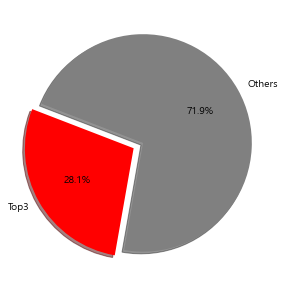

In [45]:
ratio = [28.08,71.92]
labels = ['Top3', 'Others']
colors = ['red', 'gray']
explode = [0.10, 0]

fig, ax = plt.subplots(figsize=(10,5))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260,
        explode = explode, counterclock=False, shadow=True, colors=colors)
plt.show()

### CPU종류와 GPU종류에 따른 가격

In [34]:
notebooks_group_2 = (
     notebooks.groupby(['제조사', 'CPU 종류', 'GPU 칩셋'])[['가격(원)']]
    .agg(['max', 'min', 'mean'])
    .pipe(flat_cols)
    .reset_index(['CPU 종류', 'GPU 칩셋'])
)

notebooks_group_2

,CPU 종류,GPU 칩셋,가격(원)_max,가격(원)_min,가격(원)_mean
제조사,,,,,
APPLE,실리콘 M1,M1 7 core,1098260,1088300,1093280.0
APPLE,실리콘 M1,M1 8 core,1595320,1424980,1510150.0
APPLE,실리콘 M1 PRO,M1 PRO 14 core,2584000,2584000,2584000.0
APPLE,실리콘 M1 PRO,M1 PRO 16 core,3287290,3003140,3108565.0
ASUS,라이젠7-4세대,RTX3050,1170000,1170000,1170000.0
...,...,...,...,...,...
한성컴퓨터,코어i7-12세대,RTX3050 Ti,1559000,1559000,1559000.0
한성컴퓨터,코어i7-12세대,RTX3060,1899000,1899000,1899000.0
한성컴퓨터,코어i7-12세대,RTX3070 Ti,2459000,2359000,2409000.0


## 제조사별 화면크기 제작 성향 비교  
: 전반적인 화면 분포를 확인해보았을때,  
제조사별로 최소 13인치 ~ 최대 17인치의 화면을 제작하는 것으로 나타나며  
전반적인 화면의 평균값은 15.27인치에 해당한다.

In [35]:
notebooks_group_3 = (
    notebooks.groupby('제조사')[['화면 크기(인치)']]
    .agg(['max', 'min', 'mean']).round()
    .pipe(flat_cols)
)

notebooks_group_3

,화면 크기(인치)_max,화면 크기(인치)_min,화면 크기(인치)_mean
제조사,,,
APPLE,16.0,13.0,14.0
ASUS,17.0,13.0,16.0
DELL,17.0,16.0,16.0
GIGABYTE,17.0,16.0,16.0
HP,17.0,13.0,15.0
LG전자,17.0,13.0,16.0
MSI,17.0,13.0,16.0
Microsoft,14.0,14.0,14.0
Razer,17.0,14.0,15.0


In [39]:
notebooks_group_3['화면 크기(인치)_mean'].values.mean().round(2)

15.27

## 제조사별 노트북의 무게 비교
: '가벼운 노트북'으로는 LG의 그램으로 대중들에게 익숙하지만,  
실제 가벼운 가장 노트북을 가진 제조사는 삼성전자에 해당한다.  
또, 전반적인 노트북들의 평균 무게는 1.83kg에 해당한다

In [40]:
notebooks_group_4 = (
    notebooks.groupby('제조사')[['무게(kg)']]
    .agg(['max', 'min', 'mean']).round(3)
    .pipe(flat_cols)

)

notebooks_group_4

,무게(kg)_max,무게(kg)_min,무게(kg)_mean
제조사,,,
APPLE,2.10,1.29,1.637
ASUS,2.90,1.14,2.026
DELL,2.96,1.81,2.289
GIGABYTE,2.60,2.20,2.375
HP,2.46,0.97,1.812
LG전자,1.85,0.98,1.350
MSI,2.90,1.29,2.115
Microsoft,1.82,1.82,1.820
Razer,2.75,1.78,2.066


In [41]:
notebooks_group_4['무게(kg)_mean'].values.mean().round(2)

1.83

## 3.5. 제조사별 GPU 칩셋 가격 비교
: 제조사별 GPU 칩셋의 값들을 가격이 싼 것부터 나열해봤다.

In [1275]:
notebooks.groupby(['제조사','GPU 칩셋'],as_index=False).apply(lambda df: df.sort_values(
    '가격',ascending=False
    ).head(1)
).droplevel(0)

,제조사,가격,USB(개),무게(kg),어댑터(W),HDMI,저장 용량(GB),메모리(GB),두께(mm),화면 크기,웹캠(HD),광시야각,배터리(Wh),방향키(ㅡ형/ㅗ형),CPU 종류,운영체제(OS),화면 비율,메모리 타입,저장장치 종류,GPU 칩셋
제품명,,,,,,,,,,,,,,,,,,,,
APPLE 2020 맥북에어 MGN63KH/A,APPLE,1098260,2,1.29,30.0,0,256,8,16.1,13.3,1,0,49.90,1,실리콘 M1,macOS Big Sur,16:10,NaN,SSD,M1 7 core
APPLE 2020 맥북프로13 MYD82KH/A,APPLE,1595320,2,1.40,61.0,0,256,8,15.6,13.3,1,0,58.20,1,실리콘 M1,macOS Big Sur,16:10,NaN,SSD,M1 8 core
APPLE 2021 맥북프로14 MKGP3KH/A,APPLE,2584000,3,1.60,67.0,1,512,16,15.5,14.2,0,0,70.00,1,실리콘 M1 PRO,macOS Monterey,NaN,NaN,SSD,M1 PRO 14 core
APPLE 2021 맥북프로16 MK193KH/A,APPLE,3287290,3,2.10,140.0,1,1024,16,16.8,16.2,0,0,100.00,1,실리콘 M1 PRO,macOS Monterey,NaN,NaN,SSD,M1 PRO 16 core
ASUS TUF Gaming F15 FX506LH-HN004,ASUS,849000,4,2.30,150.0,0,512,8,24.9,15.6,1,0,48.00,1,코어i5-10세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),GTX1650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
한성컴퓨터 TFG7275T,한성컴퓨터,1559000,4,2.60,150.0,0,500,16,28.0,17.3,1,1,53.35,1,코어i7-12세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3050 Ti
한성컴퓨터 TFG7276LC,한성컴퓨터,2259000,4,2.50,230.0,0,500,16,25.0,17.3,1,1,62.32,1,코어i9-12세대,미포함(프리도스),16:9,DDR5,M.2(NVMe),RTX3060
한성컴퓨터 TFG7277LCW,한성컴퓨터,2879000,4,2.50,280.0,0,500,16,25.0,17.3,1,1,62.32,1,코어i9-12세대,윈도우11홈,16:9,DDR5,M.2(NVMe),RTX3070 Ti


## 3.6. CPU별 배터리 성능의 가격 비교
: CPU별 배터리 성능의 값들을 가격이 비싼 것부터 나열해봤다.

In [1285]:
notebooks.groupby('CPU 종류',as_index=False).apply(lambda df: df.sort_values(
    '배터리(Wh)',ascending=False
    ).head(1)
).droplevel(0).sort_values('가격',ascending=False)


,제조사,가격,USB(개),무게(kg),어댑터(W),HDMI,저장 용량(GB),메모리(GB),두께(mm),화면 크기,웹캠(HD),광시야각,배터리(Wh),방향키(ㅡ형/ㅗ형),CPU 종류,운영체제(OS),화면 비율,메모리 타입,저장장치 종류,GPU 칩셋
제품명,,,,,,,,,,,,,,,,,,,,
레노버 씽크패드 P15 Gen2 20YQ007QKR 32GB램,레노버,6488990,5,2.87,230.0,0,512,32,31.45,15.6,1,1,94.00,1,제온,윈도우11프로,16:9,DDR4,M.2(NVMe),RTX A5000
DELL 프리시전 M7560 i9 11950 A3000 UHD 64GB램,DELL,6039870,4,2.45,NaN,0,1024,64,27.36,15.6,0,0,95.00,0,코어i9-11세대,윈도우10 프로,16:9,DDR4,M.2(NVMe),RTX A3000
MSI GE시리즈 레이더 GE76 12UHS-i9 4K 디럭스 에디션,MSI,5099000,5,2.90,330.0,1,2048,64,25.90,17.3,0,1,99.90,1,코어i9-12세대,미포함(프리도스),16:9,DDR5,M.2(NVMe),RTX3080 Ti
MSI GE시리즈 레이더 GE76 12UHS 4K W11,MSI,4790000,5,2.90,330.0,1,2048,32,25.90,17.3,0,1,99.90,1,코어i7-12세대,윈도우11프로,16:9,DDR5,M.2(NVMe),RTX3080 Ti
APPLE 2021 맥북프로16 MK193KH/A,APPLE,3287290,3,2.10,140.0,1,1024,16,16.80,16.2,0,0,100.00,1,실리콘 M1 PRO,macOS Monterey,NaN,NaN,SSD,M1 PRO 16 core
ASUS ROG STRIX G17 G713RS-LL012,ASUS,2780000,4,2.90,280.0,0,1024,16,28.30,17.3,0,0,90.00,1,라이젠9-5세대,미포함(프리도스),16:9,DDR5,M.2(NVMe),RTX3080
LG전자 2022 그램16(12세대) 16ZD90Q-EX56K,LG전자,2049000,4,1.28,65.0,1,256,16,16.80,16.0,0,1,90.00,1,코어i5-12세대,미포함(프리도스),16:10,LPDDR5(온보드),M.2(NVMe),RTX2050
GIGABYTE AERO 15 OLED KD,GIGABYTE,1889000,4,2.20,230.0,0,512,16,20.00,15.6,0,0,99.00,1,코어i7-11세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3060
한성컴퓨터 TFG7576XG,한성컴퓨터,1690000,4,2.20,230.0,0,500,16,25.00,17.3,1,1,91.24,1,라이젠7-4세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3060


## 3.7. 가격, 무게, 배터리, 저장 용량, 메모리 들의 상관관계 비교
: 가격과 어떤 요소가 가장 연관이 있는지 중점으로 봤다.

GPU와 가격의 상관성을 비교하고 싶었지만, GPU가 문자열이라 비교하지 못하였다.

<AxesSubplot:>

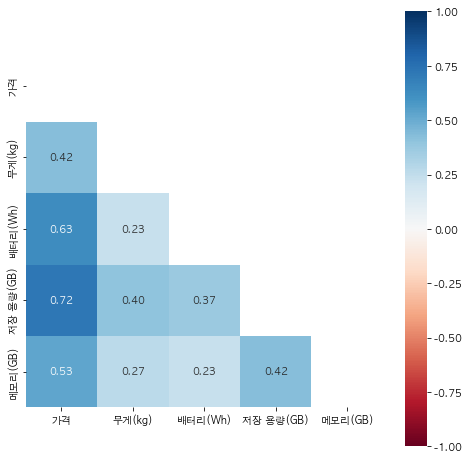

In [1175]:
fig, ax = plt.subplots(figsize=(8,8))
corr = notebooks[['가격','무게(kg)','배터리(Wh)','저장 용량(GB)','메모리(GB)']].corr()

mask= np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
corr,
mask=mask,
fmt = '.2f',
annot=True, 
ax=ax,
cmap='RdBu',
vmin=-1,
vmax=1,
square=True
)

## 3.8. CPU 종류별 가격 시각화
: CPU 종류별 가격은 어떻게 분포되어있는지 보았다.

코어i7가 M1 PRO보다 더 비싸다는 것을 확인할 수 있었다.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPU 종류', ylabel='가격'>

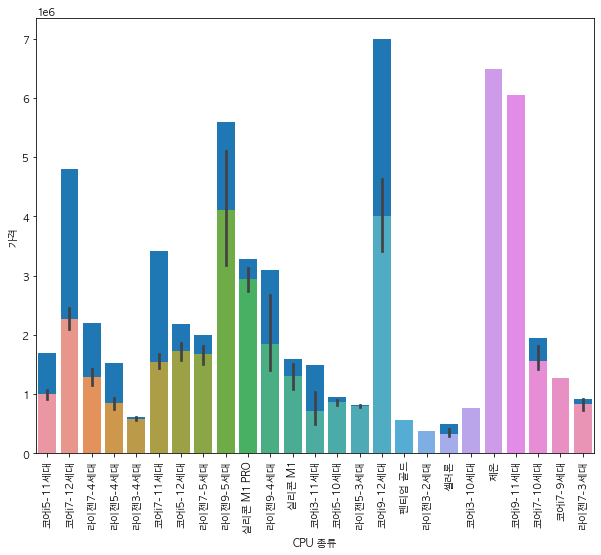

In [1226]:
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(notebooks['CPU 종류'],notebooks['가격'])
plt.xticks(rotation=90)
sns.barplot(notebooks['CPU 종류'],notebooks['가격'])


## 3.9. GPU 칩셋별 가격 시각화
: GPU 칩셋별 가격은 어떻게 분포되어있는지 보았다.

CPU에서는 apple 제품이 다른 제품들에 비해 싼 가격이었지만, GPU에서는 비싼 가격대로 보인다.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Iris Xe'),
  Text(1, 0, 'RTX2050'),
  Text(2, 0, 'MX450'),
  Text(3, 0, 'Radeon Graphics'),
  Text(4, 0, 'RTX3070'),
  Text(5, 0, 'RTX3060'),
  Text(6, 0, 'RTX3080'),
  Text(7, 0, 'Arc A350M'),
  Text(8, 0, 'Radeon 680M'),
  Text(9, 0, 'RTX3050 Ti'),
  Text(10, 0, 'M1 PRO 16 core'),
  Text(11, 0, 'M1 7 core'),
  Text(12, 0, 'RTX3050'),
  Text(13, 0, 'RTX3070 Ti'),
  Text(14, 0, 'UHD Graphics'),
  Text(15, 0, 'RTX3080 Ti'),
  Text(16, 0, 'GTX1650 Ti'),
  Text(17, 0, 'M1 PRO 14 core'),
  Text(18, 0, 'M1 8 core'),
  Text(19, 0, 'GTX1650'),
  Text(20, 0, '쿼드로 T500'),
  Text(21, 0, 'UHD 600'),
  Text(22, 0, 'MX570'),
  Text(23, 0, 'RTX A5000'),
  Text(24, 0, 'RTX A3000'),
  Text(25, 0, '라데온 RX 6600M'),
  Text(26, 0, 'MX350'),
  Text(27, 0, 'RTX2070 SUPER'),
  Text(28, 0, 'GTX1660 Ti')])

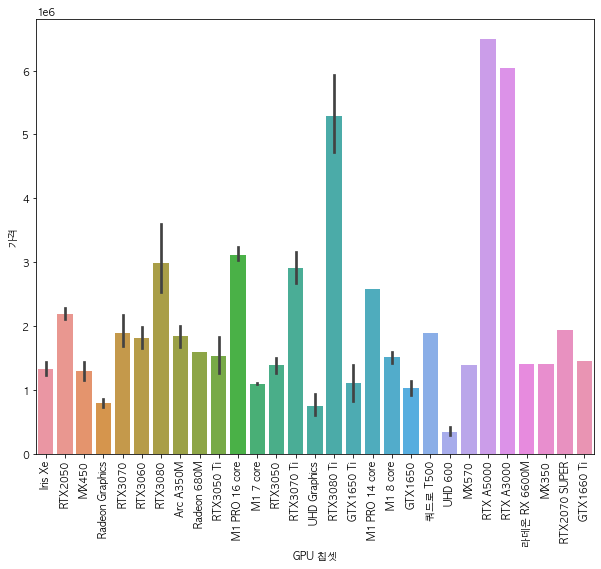

In [1177]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.bar(notebooks['GPU 칩셋'],notebooks['가격'])
sns.barplot(notebooks['GPU 칩셋'],notebooks['가격'])
plt.xticks(rotation=90)

## 3.10. 360개의 인기 제품중 인기있는 CPU 종류 시각화
: 360개 인기 제품에서 어떤 CPU가 가장 인기 있는지 확인해 봤다.

인텔에 코어 i7 11세대가 가장 많은 인기를 보여줬다.

<AxesSubplot:xlabel='count', ylabel='CPU 종류'>

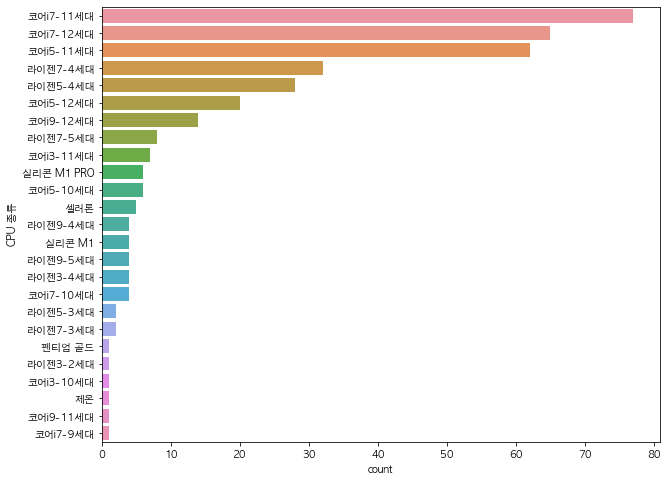

In [1178]:
#CPU 종류별 인기 제품 포함 개수
fig,ax = plt.subplots(figsize=(10,8))
sns.countplot(y='CPU 종류',data=notebooks,order= notebooks['CPU 종류'].value_counts().index)

# 3.11. 소비자 선호 조건에 맞는 제품 정렬(boolean 과 mask 활용)

다나와 쇼핌몰에서는 제조사 / CPU 종류 / 화면 크기 / 메모리 / 저장 용량 / 운영체제 / 무게 를 선택하여 볼 수 있다.

하지만, GPU 종류 / 웹캠 유무 / HDMI 포트 유무 / 방향키 종류 / 두께 / 배터리 용량등의 세분화된 스펙은 선택할 수 없다.

boolean 개념과 mask 함수를 통해 선호하는 위 스펙을 선택하면 그에 맞는 스펙의 제품이 정렬될 수 있도록 하는 알고리즘을 만들어 보았다.

- 우선 category 로 변환할 수 있는 condition_category함수

- 연속형 데이터를 범위 지정으로 bool형태로 변환하는 condition_continuous 함수

위 두 함수를 우선적으로 생성하여 각 데이터에 맞는 함수를 적용한다.

In [1180]:
#GPU 칩셋ct / 웹캠(HD) ct/ HDMIct / 방향키() ct/ USB cont / 두께 cont/ 배터리cont

#category 데이터 boolean 진행
def condition_category(col_name):
    global notebooks
    #선택해야할 옵션을 보여주고 input값으로 순번을 선택하여 입력받게한다.
    print(pd.DataFrame(notebooks[col_name].value_counts().index,index = [i for i in range(1,len(list(notebooks[col_name].value_counts().index))+1)],columns = [col_name]))
    cond = int(input(col_name+'의 번호를 입력하세요. 상관이 없다면 0을 입력하세요 :'))
    print('*'*75)
    
    #notebooks[col_name]에 원한 옵션 문자열만 빼고 다 False로 변환, 상관없다고 0을 누를 시 모두 True인 Series인 객체를 통해 다 True로 변환할 수 있도록 함.
    condition = notebooks[col_name] == notebooks[col_name].value_counts().index[int(cond)-1] if cond >0 else pd.Series(index=notebooks.index, data=[True for i in range(360)])
    return condition


#연속형 데이터 boolean 진행
def condition_continuous(col_name):
    global notebooks
    #선택해야할 옵션을 보여주고 input값으로 순번을 선택하여 입력받게한다.
    print(pd.DataFrame([max(notebooks[col_name]),min(notebooks[col_name])],index = ['max','min'],columns = [col_name]))
    cond_h = float(input(col_name+'의 원하는 수치기준(~이상)을 입력하세요. 상관이 없다면 -1을 입력하세요 :'))
    cond_l = float(input(col_name+'의 원하는 수치기준(~이하)을 입력하세요. 상관이 없다면 -1을 입력하세요 :'))
    print('*'*75)
    
    #notebooks[col_name]에 원한 옵션 조건만 빼고 다 False로 변환, 상관없다고 0을 누를 시 모두 True인 Series인 객체를 통해 다 True로 변환할 수 있도록 함.
    if (cond_h == -1.0) & (cond_l == -1.0):
        condition = (min(notebooks[col_name]) <= notebooks[col_name]) & (notebooks[col_name] <= max(notebooks[col_name]))
    elif (cond_h != -1.0) & (cond_l == -1.0):
        condition = (cond_h <= notebooks[col_name]) & (notebooks[col_name] <= max(notebooks[col_name]))
    elif (cond_h == -1.0) & (cond_l != -1.0):
        condition = (min(notebooks[col_name]) <= notebooks[col_name]) & (notebooks[col_name] <= cond_l)
    else:
        condition = (cond_h <= notebooks[col_name]) & (notebooks[col_name] <= cond_l)

    return condition

In [1224]:
#bool 형태로 된 condition들을 다 가져와 & 로 묶어서 값들이 condition_final로 객체 할당
condition_final = condition_category('GPU 칩셋')&condition_category('웹캠(HD)')&condition_category('HDMI')&condition_category('방향키(ㅡ형/ㅗ형)')&condition_continuous('USB(개)')&condition_continuous('두께(mm)')&condition_continuous('배터리(Wh)')

#mask함수로 condition_final에서 True인 값들만 추출
notebooks.mask(~condition_final).dropna(how='all').sort_values('가격') #싼 제품부터 정렬되어 나오도록

             GPU 칩셋
1           Iris Xe
2           RTX3060
3   Radeon Graphics
4        RTX3070 Ti
5        RTX3050 Ti
6           RTX3050
7             MX450
8           RTX3070
9      UHD Graphics
10          GTX1650
11          RTX3080
12       RTX3080 Ti
13          RTX2050
14        Arc A350M
15          UHD 600
16       GTX1650 Ti
17   M1 PRO 16 core
18        M1 7 core
19   M1 PRO 14 core
20        M1 8 core
21        RTX A3000
22    RTX2070 SUPER
23            MX350
24     라데온 RX 6600M
25      Radeon 680M
26        RTX A5000
27            MX570
28         쿼드로 T500
29       GTX1660 Ti


GPU 칩셋의 번호를 입력하세요. 상관이 없다면 0을 입력하세요 : 2


***************************************************************************
  웹캠(HD)
1      1
2      0


웹캠(HD)의 번호를 입력하세요. 상관이 없다면 0을 입력하세요 : 0


***************************************************************************
  HDMI
1    1
2    0


HDMI의 번호를 입력하세요. 상관이 없다면 0을 입력하세요 : 0


***************************************************************************
  방향키(ㅡ형/ㅗ형)
1          1
2          0


방향키(ㅡ형/ㅗ형)의 번호를 입력하세요. 상관이 없다면 0을 입력하세요 : 0


***************************************************************************
     USB(개)
max       6
min       0


USB(개)의 원하는 수치기준(~이상)을 입력하세요. 상관이 없다면 -1을 입력하세요 : 0
USB(개)의 원하는 수치기준(~이하)을 입력하세요. 상관이 없다면 -1을 입력하세요 : 6


***************************************************************************
     두께(mm)
max    32.4
min    11.2


두께(mm)의 원하는 수치기준(~이상)을 입력하세요. 상관이 없다면 -1을 입력하세요 : -1
두께(mm)의 원하는 수치기준(~이하)을 입력하세요. 상관이 없다면 -1을 입력하세요 : -1


***************************************************************************
     배터리(Wh)
max    100.0
min     -1.0


배터리(Wh)의 원하는 수치기준(~이상)을 입력하세요. 상관이 없다면 -1을 입력하세요 : -1
배터리(Wh)의 원하는 수치기준(~이하)을 입력하세요. 상관이 없다면 -1을 입력하세요 : -1


***************************************************************************


,제조사,가격,USB(개),무게(kg),어댑터(W),HDMI,저장 용량(GB),메모리(GB),두께(mm),화면 크기,웹캠(HD),광시야각,배터리(Wh),방향키(ㅡ형/ㅗ형),CPU 종류,운영체제(OS),화면 비율,메모리 타입,저장장치 종류,GPU 칩셋
제품명,,,,,,,,,,,,,,,,,,,,
레노버 게이밍 3 15ACH R5 3060 PRO,레노버,1131000.0,3.0,2.25,NaN,0,256.0,8.0,24.20,15.6,1,1,60.00,1,라이젠5-4세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3060
ASUS TUF Gaming F15 FX506HM-HN130,ASUS,1169000.0,4.0,2.30,200.0,0,512.0,8.0,24.50,15.6,1,0,90.00,1,코어i5-11세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3060
ASUS TUF Gaming A15 FA507RM-R6725,ASUS,1179560.0,4.0,2.20,240.0,0,512.0,8.0,24.90,15.6,1,0,90.00,1,라이젠7-5세대,미포함(프리도스),16:9,DDR5,M.2(NVMe),RTX3060
레노버 게이밍 3 15ACH R7 3060 PRO,레노버,1294000.0,3.0,2.25,NaN,0,256.0,8.0,24.20,15.6,1,1,60.00,1,라이젠7-4세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3060
MSI GF시리즈 Sword GF66 A11UE 화이트,MSI,1295000.0,4.0,2.25,180.0,1,512.0,8.0,24.90,15.6,1,1,53.50,1,코어i7-11세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3060
MSI GF시리즈 Sword GF66 A11UE 블랙,MSI,1299000.0,4.0,2.25,180.0,1,512.0,8.0,24.90,15.6,1,1,53.50,1,코어i7-11세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3060
MSI GF시리즈 Sword GF66 A11UE 블랙 WIN10 16GB램,MSI,1332840.0,4.0,2.25,180.0,1,512.0,16.0,24.90,15.6,1,1,53.50,1,코어i7-11세대,윈도우10,16:9,DDR4,M.2(NVMe),RTX3060
MSI GF시리즈 Sword GF66 A11UE 블랙 16GB램,MSI,1345000.0,4.0,2.25,180.0,1,512.0,16.0,24.90,15.6,1,1,53.50,1,코어i7-11세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3060
주연테크 리오나인 젠 L8CS36,주연테크,1349000.0,4.0,2.50,230.0,0,512.0,16.0,32.40,17.3,1,1,48.96,1,라이젠7-4세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3060


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

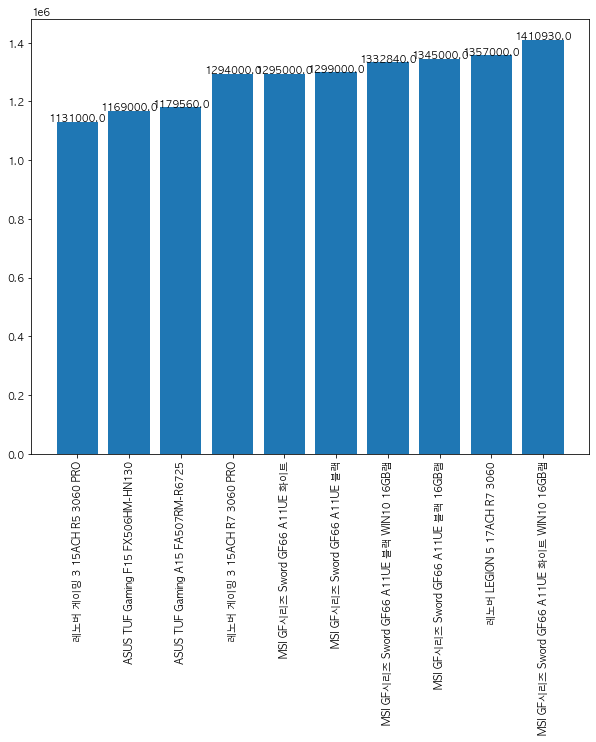

In [1296]:
#위의 정렬 시각화

def add_value_label(y_list):
    for i in range(0,10):
        plt.text(i,y_list[i],y_list[i], ha="center")

fig, ax = plt.subplots(figsize=(10,8))
plt.bar(notebooks.mask(~condition_final).dropna(how='all').sort_values('가격')[:10].index,notebooks.mask(~condition_final).dropna(how='all').sort_values('가격')['가격'][:10])
add_value_label(notebooks.mask(~condition_final).dropna(how='all').sort_values('가격')['가격'][:10])
plt.xticks(rotation=90)
